In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import pymc3 as pm
import scipy as sp
import pyccl as ccl
import os
import utils
import make_data
import getdist
from getdist import plots, MCSamples
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load data

In [2]:
names_planck  = ['H', 'Omega_m', 'sigma8']
labels_planck = ['H', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}']

planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

planck_params = []
for item in planck_tot:
    planck_params.append([item[29], item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [3]:
z_max = 1110
res = 200
x_arr = np.linspace(0, np.log(1+z_max), res)
dx = np.mean(np.diff(x_arr))
z_arr = np.exp(x_arr)-1
a_arr = 1./(1+z_arr)

path = '/home/jaimerz/PhD/Growz/data/products'


tools = utils.utils()
c = tools.c
data = make_data.make_data(z_max, res , path)


DESI_data = data.get_DESI(new=True)
WFIRST_data = data.get_WFIRST(new=True)
CC_data = data.get_CC(new=True)
DSS_data = data.get_DSS(new=True)
BOSS_data = data.get_BOSS(new=True)
eBOSS_data = data.get_eBOSS(new=True)
Wigglez_data = data.get_Wigglez(new=True)
DS17_data = data.get_DS17(new=True)
CMB_data = data.get_CMB(new=True)
FCMB_data= data.get_FCMB(new=True)

In [4]:
def get_m_s(rows):
    cols = np.transpose(rows)
    means = np.array([])
    sigmas = np.array([])
    for col in cols:
        mean = np.mean(col)
        sigma = np.std(col)
        means = np.append(means, mean)
        sigmas = np.append(sigmas, sigma)
    return means, sigmas

In [5]:
path = '/home/jaimerz/PhD/Growz/data/outputs/'
CC_DS17_BOSS_eBOSS_Wigglez_DSS = np.load(os.path.join(path,'CC_DS17_BOSS_eBOSS_Wigglez_DSS_1000_2500/samples.npz'))
CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB = np.load(os.path.join(path,'CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_1000_2500/samples.npz'))
CC_DS17_Wigglez_DSS = np.load(os.path.join(path,'CC_DS17_Wigglez_DSS_10000_10000/samples.npz'))
CC_DS17 = np.load(os.path.join(path,'CC_DS17_25000_25000/samples.npz'))
CC = np.load(os.path.join(path,'CC_10000_10000/samples.npz'))
DS17 = np.load(os.path.join(path,'DS17_10000_10000/samples.npz')) 
BOSS_eBOSS = np.load(os.path.join(path,'BOSS_eBOSS_10000_10000/samples.npz'))
BOSS_eBOSS_CMB = np.load(os.path.join(path,'BOSS_eBOSS_CMB_1000_2500/samples.npz'))
WFIRST = np.load(os.path.join(path,'WFIRST_1000_1000/samples.npz'))
DESI = np.load(os.path.join(path,'DESI_10000_10000/samples.npz'))
DESI_CMB = np.load(os.path.join(path,'DESI_CMB_1000_1000/samples.npz'))
DESI_FCMB = np.load(os.path.join(path,'DESI_FCMB_1000_1000/samples.npz'))

In [6]:
DESI_H_CMB = np.load(os.path.join(path,'H_DESI_CMB_1000_1000/samples.npz'))
DESI_H_dA_CMB = np.load(os.path.join(path,'H_DESI_dA_DESI_CMB_1000_1000/samples.npz'))
DESI_H_dA_fs8_CMB = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_CMB_1000_1000/samples.npz'))
DESI_H_dA_fs8 = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_1000_1000/samples.npz'))

DESI_H_CMB_mean = np.load(os.path.join(path,'H_DESI_CMB_1000_1000_mean/samples.npz'))
DESI_H_dA_CMB_mean = np.load(os.path.join(path,'H_DESI_dA_DESI_CMB_1000_1000_mean/samples.npz'))
DESI_H_dA_fs8_CMB_mean = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_CMB_1000_1000_mean/samples.npz'))
DESI_H_dA_fs8_mean = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_1000_1000_mean/samples.npz'))

DESI_CMB_mean = np.load(os.path.join(path,'DESI_CMB_1000_1000_mean/samples.npz'))
DESI_FCMB_mean = np.load(os.path.join(path,'DESI_FCMB_1000_1000_mean/samples.npz'))

In [7]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'H0': 'H',
               'Omega_m': '\Omega_m',
               'Omega_b': '\Omega_b',
               'Omega_L': '\Omega_\Lambda',
               's80': '\sigma_8',
               'S80': 'S_8',
               'Omega_b': '\Omega_b', 
               'M': 'M'}
names_All = ['n', 'l', 'H', 'Omega_m', 'Omega_b', 'Omega_L',  's80', 'S80', 'M']
ranges = {'l':[0.0, 100]}

# Triangle Plots

In [8]:
def make_samples(file, names, ranges, label):
    samples = []
    for name in names:
        samples.append(file[name])
        
    labels = []
    for name in names:
        labels.append(labels_dict[name])
        
    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges)

In [9]:
#WFIRST_samples = make_samples(WFIRST, ['n', 'l', 'H0'], ranges, 'WFIRST')
DESI_samples = make_samples(DESI, ['n', 'l', 'H0', 'Omega_m', 's80', 'S80'], ranges, 'DESI')
DESI_CMB_samples = make_samples(DESI_CMB, ['n', 'l', 'H0', 'Omega_m',  'Omega_L', 's80', 'S80'], ranges, 'DESI+CMB')
CC_samples = make_samples(CC, ['n', 'l', 'H0'], ranges, 'CC') 
DS17_samples = make_samples(DS17, ['n', 'l', 'H0'], ranges, 'DS17')
WFIRST_samples = make_samples(WFIRST, ['n', 'l', 'H0'], ranges, 'WFIRST')
BOSS_eBOSS_samples = make_samples(BOSS_eBOSS, ['n', 'l', 'H0', 'Omega_m', 'Omega_b', 's80', 'S80'], ranges, 'BOSSS+eBOSS')
BOSS_eBOSS_CMB_samples = make_samples(BOSS_eBOSS_CMB, ['n', 'l', 'H0', 'Omega_m', 'Omega_L', 'Omega_b', 's80', 'S80'], 
                                      ranges, 'BOSSS+eBOSS+CMB')
CC_DS17_samples = make_samples(CC_DS17, ['n', 'l', 'H0', 'M'], ranges, 'CC+DS17') 
CC_DS17_Wigglez_DSS_samples = make_samples(CC_DS17_Wigglez_DSS,
                                           ['n', 'l', 'H0', 'Omega_m', 's80', 'S80', 'M'],
                                           ranges, 'CC_DS17_Wigglez_DSS')
CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples = make_samples(CC_DS17_BOSS_eBOSS_Wigglez_DSS,
                                                      ['n', 'l', 'H0', 'Omega_m', 'Omega_L', 'Omega_b', 's80', 'S80'],
                                                      ranges, 'CC_DS17_BOSS_eBOSS_Wigglez_DSS')
CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_samples = make_samples(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB,
                                                      ['n', 'l', 'H0', 'Omega_m', 'Omega_L', 'Omega_b', 's80', 'S80'],
                                                      ranges, 'CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


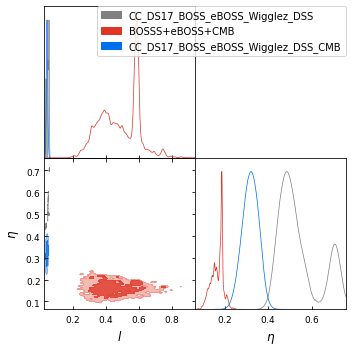

In [10]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples,
                 BOSS_eBOSS_CMB_samples,
                CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_samples], 
                ['l', 'n'],
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

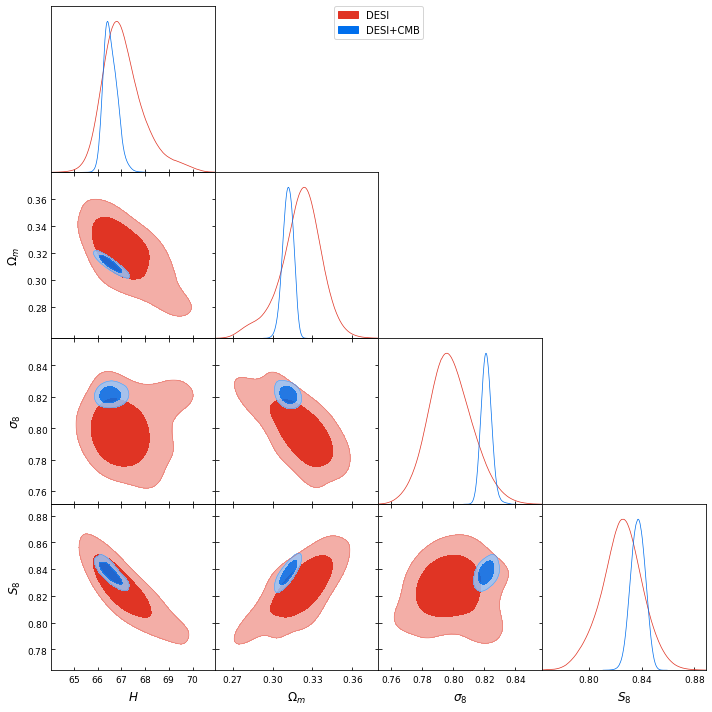

In [11]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DESI_samples, DESI_CMB_samples],
                ['H0', 'Omega_m', 's80', 'S80'],
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

/home/jaimerz/.local/lib/python3.8/site-packages/getdist/plots.py:1895: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  self.legend = self.fig.legend(lines, legend_labels, loc=legend_loc, **args)


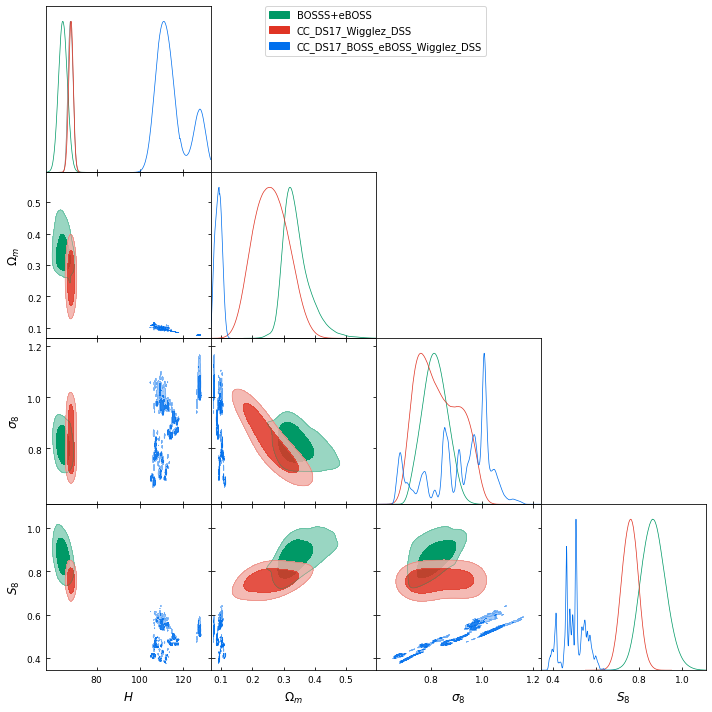

In [12]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([BOSS_eBOSS_samples, CC_DS17_samples,
                 CC_DS17_Wigglez_DSS_samples, 
                 CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples], 
                ['H0', 'Omega_m', 's80', 'S80'], 
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

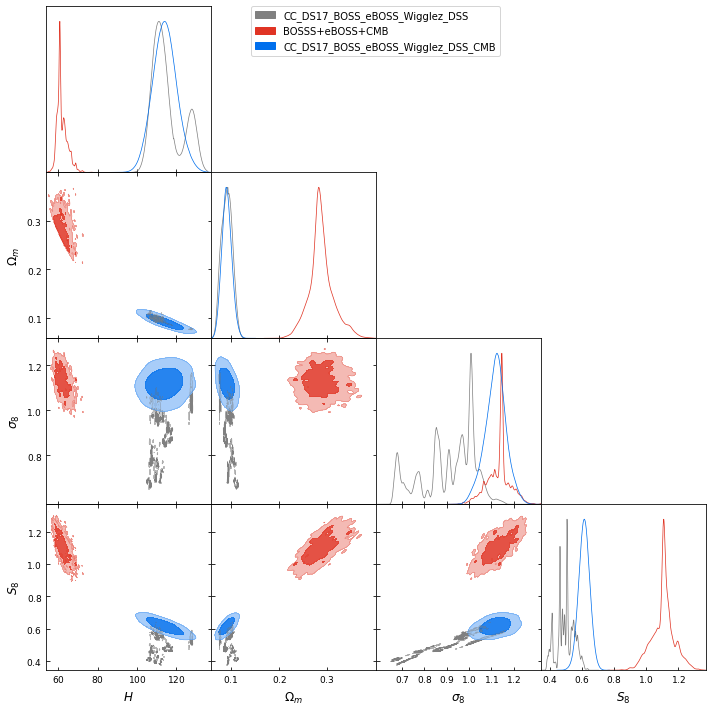

In [13]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples,
                 BOSS_eBOSS_CMB_samples,
                CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_samples], 
                ['H0', 'Omega_m', 's80', 'S80'], 
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

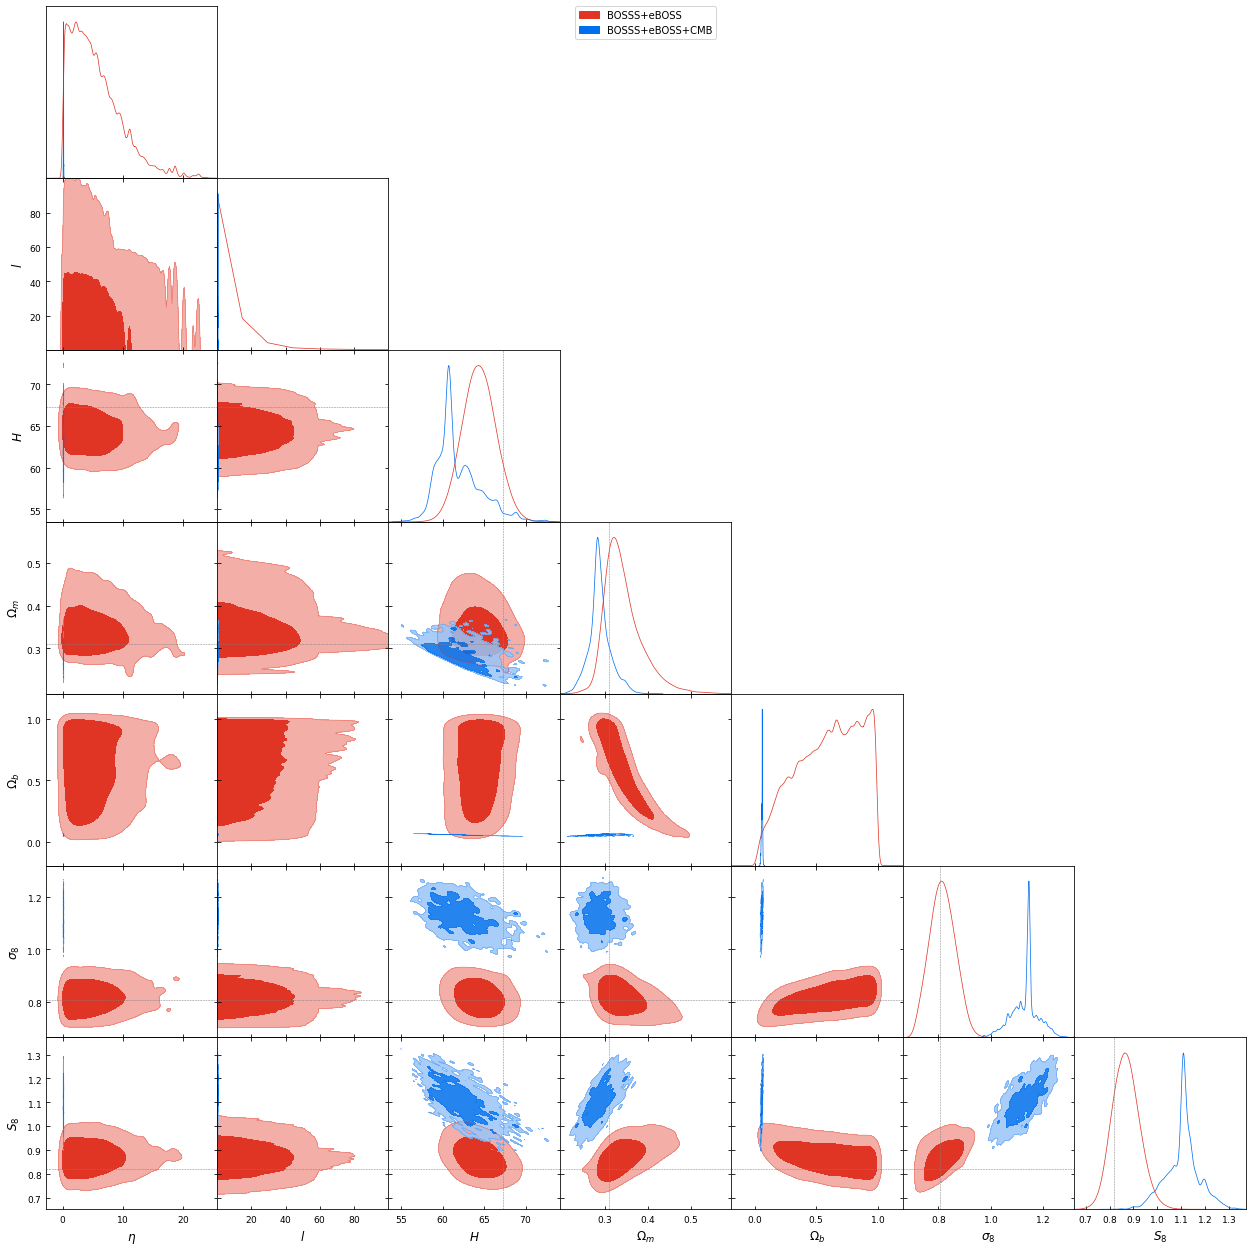

In [14]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([BOSS_eBOSS_samples, BOSS_eBOSS_CMB_samples], filled=True,
                markers={'H0':67.3, 'Omega_m':0.31, 's80': 0.806, 'S80': 0.819 ,'Df': 0.044})
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_forecast.pdf')

# H gp 

In [15]:
tools = utils.utils()
c = tools.c

H_All_m, H_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['Hz'])
H_All_CMB_m, H_All_CMB_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB['Hz'])
H_CC_DS17_Wigglez_DSS_m, H_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['Hz'])
H_CC_DS17_m, H_CC_DS17_s = get_m_s(CC_DS17['Hz'])
H_BOSS_eBOSS_m, H_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['Hz'])
H_BOSS_eBOSS_CMB_m, H_BOSS_eBOSS_CMB_s = get_m_s(BOSS_eBOSS_CMB['Hz'])
H_DESI_m, H_DESI_s = get_m_s(DESI['Hz'])
###
H_DESI_CMB_m, H_DESI_CMB_s = get_m_s(DESI_CMB['Hz'])
H_DESI_FCMB_m, H_DESI_FCMB_s = get_m_s(DESI_FCMB['Hz'])
###
H_CC_m, H_CC_s = get_m_s(CC['Hz'])
H_DS17_m, H_DS17_s = get_m_s(DS17['Hz'])
H_WFIRST_m, H_WFIRST_s = get_m_s(WFIRST['Hz'])

H_DESI_H_CMB_m, H_DESI_H_CMB_s = get_m_s(DESI_H_CMB['Hz'])
H_DESI_H_dA_CMB_m, H_DESI_H_dA_CMB_s = get_m_s(DESI_H_dA_CMB['Hz'])
H_DESI_H_dA_fs8_CMB_m, H_DESI_H_dA_fs8_CMB_s = get_m_s(DESI_H_dA_fs8_CMB['Hz'])
H_DESI_H_dA_fs8_m, H_DESI_H_dA_fs8_s = get_m_s(DESI_H_dA_fs8['Hz'])

H_DESI_H_CMB_mean_m, H_DESI_H_CMB_mean_s = get_m_s(DESI_H_CMB_mean['Hz'])
H_DESI_H_dA_CMB_mean_m, H_DESI_H_dA_CMB_mean_s = get_m_s(DESI_H_dA_CMB_mean['Hz'])
H_DESI_H_dA_fs8_CMB_mean_m, H_DESI_H_dA_fs8_CMB_mean_s = get_m_s(DESI_H_dA_fs8_CMB_mean['Hz'])
H_DESI_H_dA_fs8_mean_m, H_DESI_H_dA_fs8_mean_s = get_m_s(DESI_H_dA_fs8_mean['Hz'])

H_DESI_CMB_mean_m, H_DESI_CMB_mean_s = get_m_s(DESI_CMB_mean['Hz'])
H_DESI_FCMB_mean_m, H_DESI_FCMB_mean_s = get_m_s(DESI_FCMB_mean['Hz'])

z_planck = z_arr[z_arr<1085]
Planck_preds = tools.get_preds(CC['z_arr'], mode = 'Planck')
Planck_preds2 = tools.get_preds(z_planck, mode = 'Planck')
#Riess_preds = tools.get_preds(CC['z_arr'], mode = 'Riess')
#Panth_preds = tools.get_preds(CC['z_arr'], mode = 'Panth')

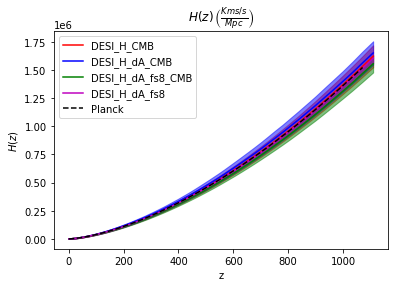

In [16]:
plt.plot(DESI_H_CMB['z_arr'],  H_DESI_H_CMB_m, color ='r', label='DESI_H_CMB')
plt.fill_between(DESI_H_CMB['z_arr'], H_DESI_H_CMB_m+H_DESI_H_CMB_s,
                 H_DESI_H_CMB_m-H_DESI_H_CMB_s, color='r', alpha=.5)

plt.plot(DESI_H_dA_CMB['z_arr'],  H_DESI_H_dA_CMB_m, color ='b', label='DESI_H_dA_CMB')
plt.fill_between(DESI_H_dA_CMB['z_arr'], H_DESI_H_dA_CMB_m+H_DESI_H_dA_CMB_s,
                 H_DESI_H_dA_CMB_m-H_DESI_H_dA_CMB_s, color='b', alpha=.5)

plt.plot(DESI_H_dA_fs8_CMB['z_arr'],  H_DESI_H_dA_fs8_CMB_m, color ='g', label='DESI_H_dA_fs8_CMB')
plt.fill_between(DESI_H_dA_fs8_CMB['z_arr'], H_DESI_H_dA_fs8_CMB_m+H_DESI_H_dA_fs8_CMB_s,
                 H_DESI_H_dA_fs8_CMB_m-H_DESI_H_dA_fs8_CMB_s, color='g', alpha=.5)

plt.plot(DESI_H_dA_fs8['z_arr'],  H_DESI_H_dA_fs8_m, color ='m', label='DESI_H_dA_fs8')
plt.fill_between(DESI_H_dA_fs8['z_arr'], H_DESI_H_dA_fs8_m+H_DESI_H_dA_fs8_s,
                 H_DESI_H_dA_fs8_m-H_DESI_H_dA_fs8_s, color='m', alpha=.5)

plt.plot(z_planck, Planck_preds2['Hkms_arr'], 'k--', label='Planck')

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

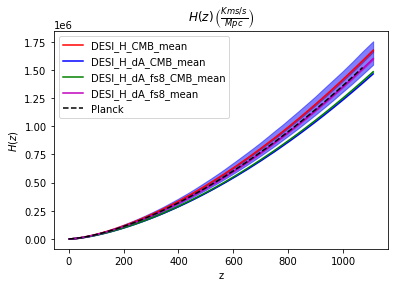

In [17]:
plt.plot(DESI_H_CMB_mean['z_arr'],  H_DESI_H_CMB_mean_m, color ='r', label='DESI_H_CMB_mean')
plt.fill_between(DESI_H_CMB['z_arr'], H_DESI_H_CMB_mean_m+H_DESI_H_CMB_mean_s,
                 H_DESI_H_CMB_mean_m-H_DESI_H_CMB_mean_s, color='r', alpha=.5)

plt.plot(DESI_H_dA_CMB_mean['z_arr'],  H_DESI_H_dA_CMB_mean_m, color ='b', label='DESI_H_dA_CMB_mean')
plt.fill_between(DESI_H_dA_CMB['z_arr'], H_DESI_H_dA_CMB_m+H_DESI_H_dA_CMB_s,
                 H_DESI_H_dA_CMB_m-H_DESI_H_dA_CMB_s, color='b', alpha=.5)

plt.plot(DESI_H_dA_fs8_CMB_mean['z_arr'],  H_DESI_H_dA_fs8_CMB_mean_m, color ='g', label='DESI_H_dA_fs8_CMB_mean')
plt.fill_between(DESI_H_dA_fs8_CMB['z_arr'], H_DESI_H_dA_fs8_CMB_mean_m+H_DESI_H_dA_fs8_CMB_mean_s,
                 H_DESI_H_dA_fs8_CMB_mean_m-H_DESI_H_dA_fs8_CMB_mean_s, color='g', alpha=.5)

plt.plot(DESI_H_dA_fs8_mean['z_arr'],  H_DESI_H_dA_fs8_mean_m, color ='m', label='DESI_H_dA_fs8_mean')
plt.fill_between(DESI_H_dA_fs8['z_arr'], H_DESI_H_dA_fs8_mean_m+H_DESI_H_dA_fs8_mean_s,
                 H_DESI_H_dA_fs8_mean_m-H_DESI_H_dA_fs8_mean_s, color='m', alpha=.5)

plt.plot(z_planck, Planck_preds2['Hkms_arr'], 'k--', label='Planck')

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

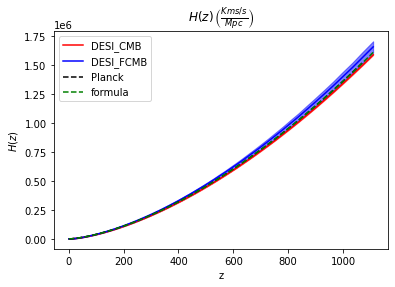

In [36]:
plt.plot(DESI_CMB['z_arr'],  H_DESI_CMB_m, color ='r', label='DESI_CMB')
plt.fill_between(DESI_H_CMB['z_arr'], H_DESI_CMB_m+H_DESI_CMB_s,
                 H_DESI_CMB_mean_m-H_DESI_CMB_mean_s, color='r', alpha=.5)

plt.plot(DESI_FCMB['z_arr'],  H_DESI_FCMB_m, color ='b', label='DESI_FCMB')
plt.fill_between(DESI_FCMB['z_arr'], H_DESI_FCMB_m+H_DESI_FCMB_s,
                 H_DESI_FCMB_m-H_DESI_FCMB_s, color='b', alpha=.5)

plt.plot(z_planck, Planck_preds2['Hkms_arr'], 'k--', label='Planck')
plt.plot(z_arr, DESI_data['H_arr'], 'g--', label='formula')

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

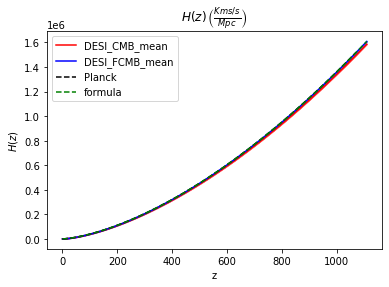

In [37]:
plt.plot(DESI_CMB_mean['z_arr'],  H_DESI_CMB_mean_m, color ='r', label='DESI_CMB_mean')
plt.fill_between(DESI_CMB_mean['z_arr'], H_DESI_CMB_mean_m+H_DESI_CMB_mean_s,
                 H_DESI_CMB_mean_m-H_DESI_CMB_mean_s, color='r', alpha=.5)

plt.plot(DESI_FCMB_mean['z_arr'],  H_DESI_FCMB_mean_m, color ='b', label='DESI_FCMB_mean')
plt.fill_between(DESI_FCMB_mean['z_arr'], H_DESI_FCMB_mean_m+H_DESI_FCMB_mean_s,
                 H_DESI_FCMB_mean_m-H_DESI_FCMB_mean_s, color='b', alpha=.5)

plt.plot(z_planck, Planck_preds2['Hkms_arr'], 'k--', label='Planck')
plt.plot(z_arr, DESI_data['H_arr'], 'g--', label='formula')

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

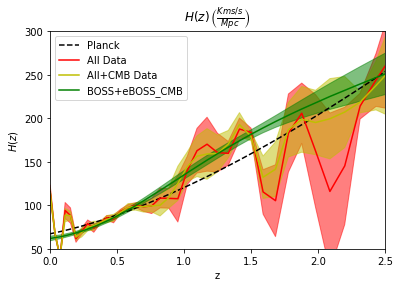

In [20]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')
#plt.plot(z_DESIfs8, Panth_preds['Hkms_arr'], 'k-.', label='Panth')

#plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='ko', label='CC')
#plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='kv', label='BOSS DR12')
#plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='ks', label='eBOSS DR16')

#plt.plot(BOSS_eBOSS['z_arr'],  H_BOSS_eBOSS_m, color ='m', label='BOSS+eBOSS')
#plt.fill_between(BOSS_eBOSS['z_arr'], H_BOSS_eBOSS_m+H_BOSS_eBOSS_s,
#                 H_BOSS_eBOSS_m-H_BOSS_eBOSS_s, color='m', alpha=.5)
#plt.plot(CC_DS17['z_arr'],  H_CC_DS17_m, color ='b', label='CC+DS17')
#plt.fill_between(CC_DS17['z_arr'], H_CC_DS17_m+H_CC_DS17_s,
#                 H_CC_DS17_m-H_CC_DS17_s, color='b', alpha=.5)
#plt.plot(CC_DS17_Wigglez_DSS['z_arr'],  H_CC_DS17_Wigglez_DSS_m, color ='g', label='CC+DS17+Wigglez+DSS')
#plt.fill_between(CC_DS17['z_arr'], H_CC_DS17_Wigglez_DSS_m+H_CC_DS17_Wigglez_DSS_s,
#                 H_CC_DS17_Wigglez_DSS_m-H_CC_DS17_Wigglez_DSS_s, color='g', alpha=.5)
plt.plot(DESI_CMB['z_arr'],  H_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], H_All_m+H_All_s, H_All_m-H_All_s, color='r', alpha=.5)
plt.plot(DESI_CMB['z_arr'],  H_All_CMB_m, color ='y', label='All+CMB Data')
plt.fill_between(DESI_CMB['z_arr'], H_All_CMB_m+H_All_CMB_s, H_All_CMB_m-H_All_CMB_s, color='y', alpha=.5)
plt.plot(BOSS_eBOSS_CMB['z_arr'],  H_BOSS_eBOSS_CMB_m, color ='g', label='BOSS+eBOSS_CMB')
plt.fill_between(BOSS_eBOSS_CMB['z_arr'], H_BOSS_eBOSS_CMB_m+H_BOSS_eBOSS_CMB_s,
                 H_BOSS_eBOSS_CMB_m-H_BOSS_eBOSS_CMB_s, color='g', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

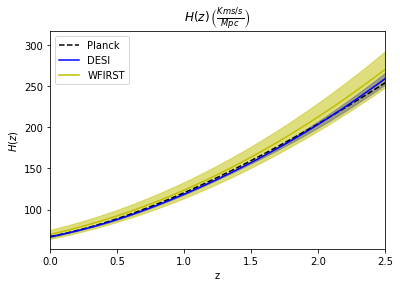

In [21]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s, H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(WFIRST['z_arr'],  H_WFIRST_m, color ='y', label='WFIRST')
plt.fill_between(WFIRST['z_arr'], H_WFIRST_m+H_WFIRST_s, H_WFIRST_m-H_WFIRST_s, color='y', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf') 

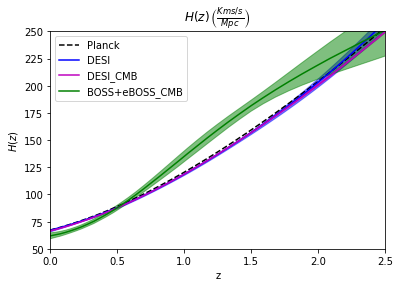

In [22]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s,
                 H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  H_DESI_CMB_m, color ='m', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], H_DESI_CMB_m+H_DESI_CMB_s,
                 H_DESI_CMB_m-H_DESI_CMB_s, color='m', alpha=.5)

plt.plot(BOSS_eBOSS_CMB['z_arr'],  H_BOSS_eBOSS_CMB_m, color ='g', label='BOSS+eBOSS_CMB')
plt.fill_between(BOSS_eBOSS_CMB['z_arr'], H_BOSS_eBOSS_CMB_m+H_BOSS_eBOSS_CMB_s,
                 H_BOSS_eBOSS_CMB_m-H_BOSS_eBOSS_CMB_s, color='g', alpha=.5)


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 250)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf') 

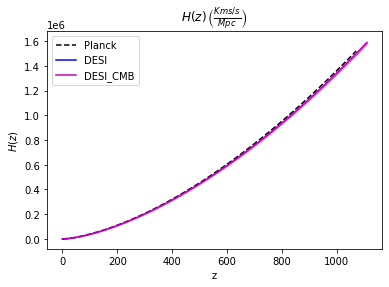

In [23]:
plt.plot(z_planck, Planck_preds2['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s,
                 H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  H_DESI_CMB_m, color ='m', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], H_DESI_CMB_m+H_DESI_CMB_s,
                 H_DESI_CMB_m-H_DESI_CMB_s, color='m', alpha=.5)

# axis labels and title
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf') 

# dM

In [24]:
dM_All_m, dM_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['dMz'])
dM_All_CMB_m, dM_All_CMB_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB['dMz'])
dM_CC_DS17_m, dM_CC_DS17_s = get_m_s(CC_DS17['dMz'])
dM_CC_DS17_Wigglez_DSS_m, dM_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['dMz'])
dM_BOSS_eBOSS_m, dM_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['dMz'])
dM_BOSS_eBOSS_CMB_m, dM_BOSS_eBOSS_CMB_s = get_m_s(BOSS_eBOSS_CMB['dMz'])
dM_DESI_CMB_m, dM_DESI_CMB_s = get_m_s(DESI_CMB['dMz'])
dM_DESI_FCMB_m, dM_DESI_FCMB_s = get_m_s(DESI_FCMB['dMz'])
dM_DESI_m, dM_DESI_s = get_m_s(DESI['dMz'])
dM_DS17_m, dM_DS17_s = get_m_s(DS17['dMz'])

dM_DESI_H_dA_CMB_m, dM_DESI_H_dA_CMB_s = get_m_s(DESI_H_dA_CMB['dMz'])
dM_DESI_H_dA_fs8_CMB_m, dM_DESI_H_dA_fs8_CMB_s = get_m_s(DESI_H_dA_fs8_CMB['dMz'])
dM_DESI_H_dA_fs8_m, dM_DESI_H_dA_fs8_s = get_m_s(DESI_H_dA_fs8['dMz'])

dM_DESI_H_dA_CMB_mean_m, dM_DESI_H_dA_CMB_mean_s = get_m_s(DESI_H_dA_CMB_mean['dMz'])
dM_DESI_H_dA_fs8_CMB_mean_m, dM_DESI_H_dA_fs8_CMB_mean_s = get_m_s(DESI_H_dA_fs8_CMB_mean['dMz'])
dM_DESI_H_dA_fs8_mean_m, dM_DESI_H_dA_fs8_mean_s = get_m_s(DESI_H_dA_fs8_mean['dMz'])

dM_DESI_CMB_mean_m, dM_DESI_CMB_mean_s = get_m_s(DESI_CMB_mean['dMz'])
dM_DESI_FCMB_mean_m, dM_DESI_FCMB_mean_s = get_m_s(DESI_FCMB_mean['dMz'])

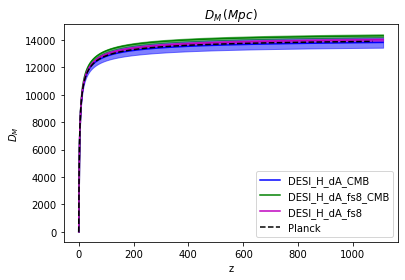

In [25]:
plt.plot(DESI_H_dA_CMB['z_arr'],  dM_DESI_H_dA_CMB_m, color ='b', label='DESI_H_dA_CMB')
plt.fill_between(DESI_H_dA_CMB['z_arr'], dM_DESI_H_dA_CMB_m+dM_DESI_H_dA_CMB_s,
                 dM_DESI_H_dA_CMB_m-dM_DESI_H_dA_CMB_s, color='b', alpha=.5)#

plt.plot(DESI_H_dA_fs8_CMB['z_arr'],  dM_DESI_H_dA_fs8_CMB_m, color ='g', label='DESI_H_dA_fs8_CMB')
plt.fill_between(DESI_H_dA_fs8_CMB['z_arr'], dM_DESI_H_dA_fs8_CMB_m+dM_DESI_H_dA_fs8_CMB_s,
                 dM_DESI_H_dA_fs8_CMB_m-dM_DESI_H_dA_fs8_CMB_s, color='g', alpha=.5)

plt.plot(DESI_H_dA_fs8['z_arr'],  dM_DESI_H_dA_fs8_m, color ='m', label='DESI_H_dA_fs8')
plt.fill_between(DESI_H_dA_fs8['z_arr'], dM_DESI_H_dA_fs8_m+dM_DESI_H_dA_fs8_s,
                 dM_DESI_H_dA_fs8_m-dM_DESI_H_dA_fs8_s, color='m', alpha=.5)

plt.plot(z_planck, Planck_preds2['dM_arr'], 'k--', label='Planck')

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

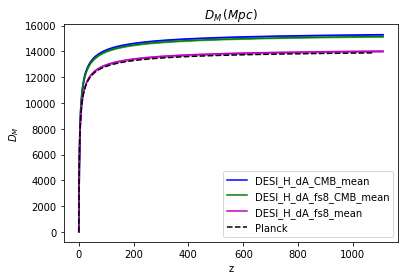

In [26]:
plt.plot(DESI_H_dA_CMB_mean['z_arr'],  dM_DESI_H_dA_CMB_mean_m, color ='b', label='DESI_H_dA_CMB_mean')
plt.fill_between(DESI_H_dA_CMB_mean['z_arr'], dM_DESI_H_dA_CMB_mean_m+dM_DESI_H_dA_CMB_mean_s,
                 dM_DESI_H_dA_CMB_mean_m-dM_DESI_H_dA_CMB_mean_s, color='b', alpha=.5)

plt.plot(DESI_H_dA_fs8_CMB_mean['z_arr'],  dM_DESI_H_dA_fs8_CMB_mean_m, color ='g', label='DESI_H_dA_fs8_CMB_mean')
plt.fill_between(DESI_H_dA_fs8_CMB['z_arr'], dM_DESI_H_dA_fs8_CMB_mean_m+dM_DESI_H_dA_fs8_CMB_mean_s,
                 dM_DESI_H_dA_fs8_CMB_mean_m-dM_DESI_H_dA_fs8_CMB_mean_s, color='g', alpha=.5)

plt.plot(DESI_H_dA_fs8_mean['z_arr'],  dM_DESI_H_dA_fs8_mean_m, color ='m', label='DESI_H_dA_fs8_mean')
plt.fill_between(DESI_H_dA_fs8_mean['z_arr'], dM_DESI_H_dA_fs8_mean_m+dM_DESI_H_dA_fs8_mean_s,
                 dM_DESI_H_dA_fs8_mean_m-dM_DESI_H_dA_fs8_mean_s, color='m', alpha=.5)

plt.plot(z_planck, Planck_preds2['dM_arr'], 'k--', label='Planck')

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

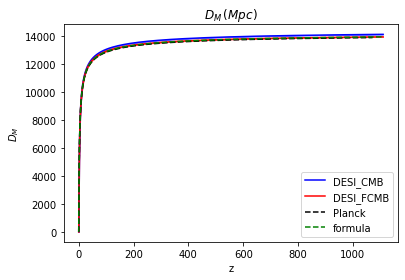

In [34]:
plt.plot(DESI_CMB['z_arr'],  dM_DESI_CMB_m, color ='b', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_DESI_CMB_m+dM_DESI_CMB_s,
                 dM_DESI_CMB_m-dM_DESI_CMB_s, color='b', alpha=.5)

plt.plot(DESI_FCMB['z_arr'],  dM_DESI_FCMB_m, color ='r', label='DESI_FCMB')
plt.fill_between(DESI_FCMB['z_arr'], dM_DESI_FCMB_m+dM_DESI_FCMB_s,
                 dM_DESI_FCMB_m-dM_DESI_FCMB_s, color='r', alpha=.5)

plt.plot(z_planck, Planck_preds2['dM_arr'], 'k--', label='Planck')
plt.plot(z_arr, DESI_data['dM_arr'], 'g--', label='formula')

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

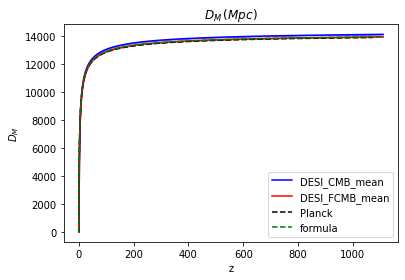

In [35]:
plt.plot(DESI_CMB_mean['z_arr'],  dM_DESI_CMB_mean_m, color ='b', label='DESI_CMB_mean')
plt.fill_between(DESI_CMB_mean['z_arr'], dM_DESI_CMB_mean_m+dM_DESI_CMB_mean_s,
                 dM_DESI_CMB_mean_m-dM_DESI_CMB_mean_s, color='b', alpha=.5)

plt.plot(DESI_FCMB_mean['z_arr'],  dM_DESI_FCMB_mean_m, color ='r', label='DESI_FCMB_mean')
plt.fill_between(DESI_FCMB_mean['z_arr'], dM_DESI_FCMB_mean_m+dM_DESI_FCMB_mean_s,
                 dM_DESI_FCMB_mean_m-dM_DESI_FCMB_mean_s, color='r', alpha=.5)

plt.plot(z_planck, Planck_preds2['dM_arr'], 'k--', label='Planck')
plt.plot(z_arr, DESI_data['dM_arr'], 'g--', label='formula')

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

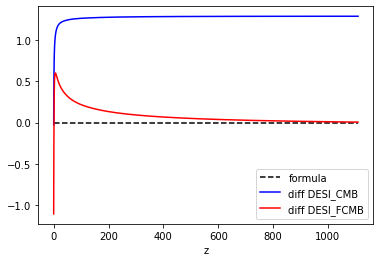

In [53]:
plt.plot(z_arr, np.zeros_like(z_arr), 'k--', label='formula')
plt.plot(z_arr[1:], 100*(dM_DESI_CMB_m-DESI_data['dM_arr'])[1:]/DESI_data['dM_arr'][1:], 'b', label='diff DESI_CMB')
plt.plot(z_arr[1:], 100*(dM_DESI_FCMB_m-DESI_data['dM_arr'])[1:]/DESI_data['dM_arr'][1:], 'r', label='diff DESI_FCMB')

plt.xlabel("z")
plt.legend();

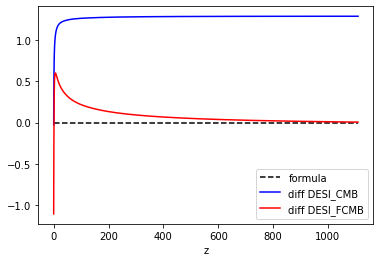

In [53]:
plt.plot(z_arr, np.zeros_like(z_arr), 'k--', label='formula')
plt.plot(z_arr[1:], 100*(dM_DESI_CMB_m-DESI_data['dM_arr'])[1:]/DESI_data['dM_arr'][1:], 'b', label='diff DESI_CMB')
plt.plot(z_arr[1:], 100*(dM_DESI_FCMB_m-DESI_data['dM_arr'])[1:]/DESI_data['dM_arr'][1:], 'r', label='diff DESI_FCMB')

plt.xlabel("z")
plt.legend();

In [ ]:
plt.plot(CC['z_arr'], Planck_preds['dM_arr'], 'k--', label='Planck')
#plt.plot(z_DESIfs8, Panth_preds['Hkms_arr'], 'k-.', label='Panth')

plt.plot(BOSS_eBOSS['z_arr'],  dM_BOSS_eBOSS_m, color ='m', label='BOSS+eBOSS')
plt.fill_between(BOSS_eBOSS['z_arr'], dM_BOSS_eBOSS_m+dM_BOSS_eBOSS_s,
                 dM_BOSS_eBOSS_m-dM_BOSS_eBOSS_s, color='m', alpha=.5)
plt.plot(CC_DS17['z_arr'],  dM_CC_DS17_m, color ='b', label='CC+DS17')
plt.fill_between(CC_DS17['z_arr'], dM_CC_DS17_m+dM_CC_DS17_s,
                 dM_CC_DS17_m-dM_CC_DS17_s, color='b', alpha=.5)
plt.plot(CC_DS17_Wigglez_DSS['z_arr'],  dM_CC_DS17_Wigglez_DSS_m, color ='g', label='CC+DS17+Wigglez+DSS')
plt.fill_between(CC_DS17['z_arr'], dM_CC_DS17_Wigglez_DSS_m+dM_CC_DS17_Wigglez_DSS_s,
                 dM_CC_DS17_Wigglez_DSS_m-dM_CC_DS17_Wigglez_DSS_s, color='g', alpha=.5)
plt.plot(DESI_CMB['z_arr'],  dM_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], dM_All_m+dM_All_s, dM_All_m-dM_All_s, color='r', alpha=.5)

plt.xlim(0, 2.5)
plt.ylim(0, 6000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')  

In [ ]:
plt.plot(CC['z_arr'], Planck_preds['dM_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  dM_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], dM_DESI_m+dM_DESI_s, dM_DESI_m-dM_DESI_s, color='b', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_DESI_CMB_m, color ='m', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_DESI_CMB_m+dM_DESI_CMB_s,
                 dM_DESI_CMB_m-dM_DESI_CMB_s, color='m', alpha=.5)

plt.plot(BOSS_eBOSS_CMB['z_arr'],  dM_BOSS_eBOSS_CMB_m, color ='g', label='BOSS+eBOSS_CMB')
plt.fill_between(BOSS_eBOSS_CMB['z_arr'], dM_BOSS_eBOSS_CMB_m+dM_BOSS_eBOSS_CMB_s,
                 dM_BOSS_eBOSS_CMB_m-dM_BOSS_eBOSS_CMB_s, color='g', alpha=.5)

plt.xlim(0, 2.5)
plt.ylim(0, 7000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_forecast.pdf') 

In [ ]:
plt.plot(z_planck, Planck_preds2['dM_arr'], 'k--', label='Planck')

plt.plot(DESI_CMB['z_arr'],  dM_DESI_CMB_m, color ='m', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_DESI_CMB_m+dM_DESI_CMB_s,
                 dM_DESI_CMB_m-dM_DESI_CMB_s, color='m', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_All_CMB_m, color ='y', label='All_CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_All_CMB_m+dM_All_CMB_s,
                 dM_All_CMB_m-dM_All_CMB_s, color='y', alpha=.5)

plt.plot(BOSS_eBOSS_CMB['z_arr'],  dM_BOSS_eBOSS_CMB_m, color ='g', label='BOSS+eBOSS_CMB')
plt.fill_between(BOSS_eBOSS_CMB['z_arr'], dM_BOSS_eBOSS_CMB_m+dM_BOSS_eBOSS_CMB_s,
                 dM_BOSS_eBOSS_CMB_m-dM_BOSS_eBOSS_CMB_s, color='g', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], dM_All_m+dM_All_s, dM_All_m-dM_All_s, color='r', alpha=.5)

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_forecast.pdf') 

# fs8

In [38]:
fs8_All_m, fs8_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['fs8z'])
fs8_All_CMB_m, fs8_All_CMB_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB['fs8z'])
fs8_BOSS_eBOSS_m, fs8_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['fs8z'])
fs8_BOSS_eBOSS_CMB_m, fs8_BOSS_eBOSS_CMB_s = get_m_s(BOSS_eBOSS_CMB['fs8z'])
fs8_CC_DS17_Wigglez_DSS_m, fs8_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['fs8z'])
fs8_DESI_m, fs8_DESI_s = get_m_s(DESI['fs8z'])
fs8_DESI_CMB_m, fs8_DESI_CMB_s = get_m_s(DESI_CMB['fs8z'])
fs8_DESI_FCMB_m, fs8_DESI_FCMB_s = get_m_s(DESI_FCMB['fs8z'])

fs8_DESI_H_dA_fs8_CMB_m, fs8_DESI_H_dA_fs8_CMB_s = get_m_s(DESI_H_dA_fs8_CMB['fs8z'])
fs8_DESI_H_dA_fs8_m, fs8_DESI_H_dA_fs8_s = get_m_s(DESI_H_dA_fs8['fs8z'])

fs8_DESI_H_dA_fs8_CMB_mean_m, fs8_DESI_H_dA_fs8_CMB_mean_s = get_m_s(DESI_H_dA_fs8_CMB_mean['fs8z'])
fs8_DESI_H_dA_fs8_mean_m, fs8_DESI_H_dA_fs8_mean_s = get_m_s(DESI_H_dA_fs8_mean['fs8z'])

fs8_DESI_CMB_mean_m, fs8_DESI_CMB_mean_s = get_m_s(DESI_CMB_mean['fs8z'])
fs8_DESI_FCMB_mean_m, fs8_DESI_FCMB_mean_s = get_m_s(DESI_FCMB_mean['fs8z'])

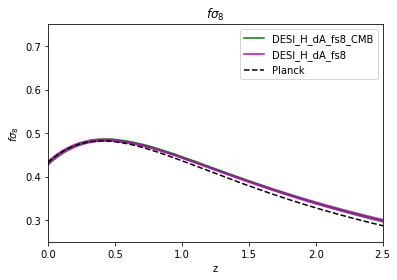

In [39]:
plt.plot(DESI_H_dA_fs8_CMB['z_arr'],  fs8_DESI_H_dA_fs8_CMB_m, color ='g', label='DESI_H_dA_fs8_CMB')
plt.fill_between(DESI_H_dA_fs8_CMB['z_arr'], fs8_DESI_H_dA_fs8_CMB_m+fs8_DESI_H_dA_fs8_CMB_s,
                 fs8_DESI_H_dA_fs8_CMB_m-fs8_DESI_H_dA_fs8_CMB_s, color='g', alpha=.5)

plt.plot(DESI_H_dA_fs8['z_arr'],  fs8_DESI_H_dA_fs8_m, color ='m', label='DESI_H_dA_fs8')
plt.fill_between(DESI_H_dA_fs8['z_arr'], fs8_DESI_H_dA_fs8_m+fs8_DESI_H_dA_fs8_s,
                 fs8_DESI_H_dA_fs8_m-fs8_DESI_H_dA_fs8_s, color='m', alpha=.5)

plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')

plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

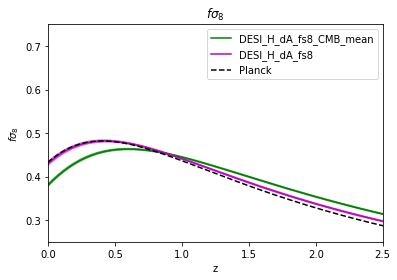

In [40]:
plt.plot(DESI_H_dA_fs8_CMB_mean['z_arr'],  fs8_DESI_H_dA_fs8_CMB_mean_m, color ='g', label='DESI_H_dA_fs8_CMB_mean')
plt.fill_between(DESI_H_dA_fs8_CMB['z_arr'], fs8_DESI_H_dA_fs8_CMB_mean_m+fs8_DESI_H_dA_fs8_CMB_mean_s,
                 fs8_DESI_H_dA_fs8_CMB_mean_m-fs8_DESI_H_dA_fs8_CMB_mean_s, color='g', alpha=.5)

plt.plot(DESI_H_dA_fs8_mean['z_arr'],  fs8_DESI_H_dA_fs8_mean_m, color ='m', label='DESI_H_dA_fs8')
plt.fill_between(DESI_H_dA_fs8_mean['z_arr'], fs8_DESI_H_dA_fs8_mean_m+fs8_DESI_H_dA_fs8_mean_s,
                 fs8_DESI_H_dA_fs8_mean_m-fs8_DESI_H_dA_fs8_mean_s, color='m', alpha=.5)

plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')

plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

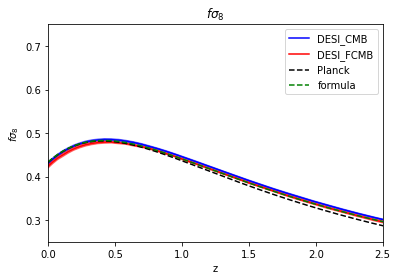

In [43]:
plt.plot(DESI_CMB['z_arr'],  fs8_DESI_CMB_m, color ='b', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], fs8_DESI_CMB_m+fs8_DESI_CMB_s,
                 fs8_DESI_CMB_m-fs8_DESI_CMB_s, color='b', alpha=.5)

plt.plot(DESI_FCMB['z_arr'],  fs8_DESI_FCMB_m, color ='r', label='DESI_FCMB')
plt.fill_between(DESI_FCMB['z_arr'], fs8_DESI_FCMB_m+fs8_DESI_FCMB_s,
                 fs8_DESI_FCMB_m-fs8_DESI_FCMB_s, color='r', alpha=.5)


plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')
plt.plot(z_arr, DESI_data['fs8_arr'], 'g--', label='formula')

plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

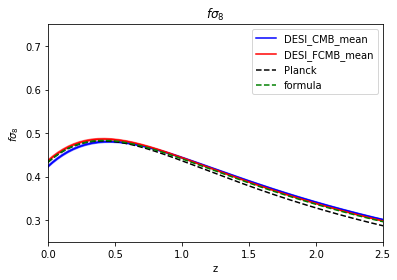

In [44]:
plt.plot(DESI_CMB_mean['z_arr'],  fs8_DESI_CMB_mean_m, color ='b', label='DESI_CMB_mean')
plt.fill_between(DESI_CMB_mean['z_arr'], fs8_DESI_CMB_mean_m+fs8_DESI_CMB_mean_s,
                 fs8_DESI_CMB_mean_m-fs8_DESI_CMB_mean_s, color='b', alpha=.5)

plt.plot(DESI_FCMB_mean['z_arr'],  fs8_DESI_FCMB_mean_m, color ='r', label='DESI_FCMB_mean')
plt.fill_between(DESI_FCMB_mean['z_arr'], fs8_DESI_FCMB_mean_m+fs8_DESI_FCMB_mean_s,
                 fs8_DESI_FCMB_mean_m-fs8_DESI_FCMB_mean_s, color='r', alpha=.5)

plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')
plt.plot(z_arr, DESI_data['fs8_arr'], 'g--', label='formula')


plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

In [ ]:
plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')

#plt.plot(BOSS_eBOSS['z_arr'],  fs8_BOSS_eBOSS_m, color ='m', label='SDSS')
#plt.fill_between(BOSS_eBOSS['z_arr'], fs8_BOSS_eBOSS_m+fs8_BOSS_eBOSS_s,
#                 fs8_BOSS_eBOSS_m-fs8_BOSS_eBOSS_s, color='m', alpha=.5)

plt.plot(BOSS_eBOSS_CMB['z_arr'],  fs8_BOSS_eBOSS_CMB_m, color ='b', label='SDSS_CMB')
plt.fill_between(BOSS_eBOSS_CMB['z_arr'], fs8_BOSS_eBOSS_CMB_m+fs8_BOSS_eBOSS_CMB_s,
                 fs8_BOSS_eBOSS_CMB_m-fs8_BOSS_eBOSS_CMB_s, color='b', alpha=.5)


#plt.plot(CC_DS17_Wigglez_DSS['z_arr'],  fs8_CC_DS17_Wigglez_DSS_m, color ='g', label='CC+DS17+Wigglez+DSS')
#plt.fill_between(CC_DS17['z_arr'], fs8_CC_DS17_Wigglez_DSS_m+fs8_CC_DS17_Wigglez_DSS_s,
#                 fs8_CC_DS17_Wigglez_DSS_m-fs8_CC_DS17_Wigglez_DSS_s, color='g', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  fs8_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], fs8_All_m+fs8_All_s, fs8_All_m-fs8_All_s, color='r', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  fs8_All_CMB_m, color ='y', label='All Data_CMB')
plt.fill_between(DESI_CMB['z_arr'], fs8_All_CMB_m+fs8_All_CMB_s,
                 fs8_All_CMB_m-fs8_All_CMB_s, color='y', alpha=.5)

plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  

In [ ]:
plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  fs8_DESI_l_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], fs8_DESI_m+fs8_DESI_s, fs8_DESI_m-fs8_DESI_s, color='b', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  fs8_DESI_CMB_m, color ='m', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], fs8_DESI_CMB_m+fs8_DESI_CMB_s,
                 fs8_DESI_CMB_m-fs8_DESI_CMB_s, color='m', alpha=.5)

plt.xlim(0, 2.5)
plt.ylim(0.2, 0.5)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_forecast.pdf')  